Start by adding all the libraries and imports

In [11]:
# Global imports
import numpy as np
import pandas as pd
from scipy import stats
from scipy.stats import norm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
# User defined files
from split_dataset import split_dataset
from model_accuracy import model_accuracy
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [12]:
# Start dataset analysis
abalone = pd.read_csv('abalone.csv')

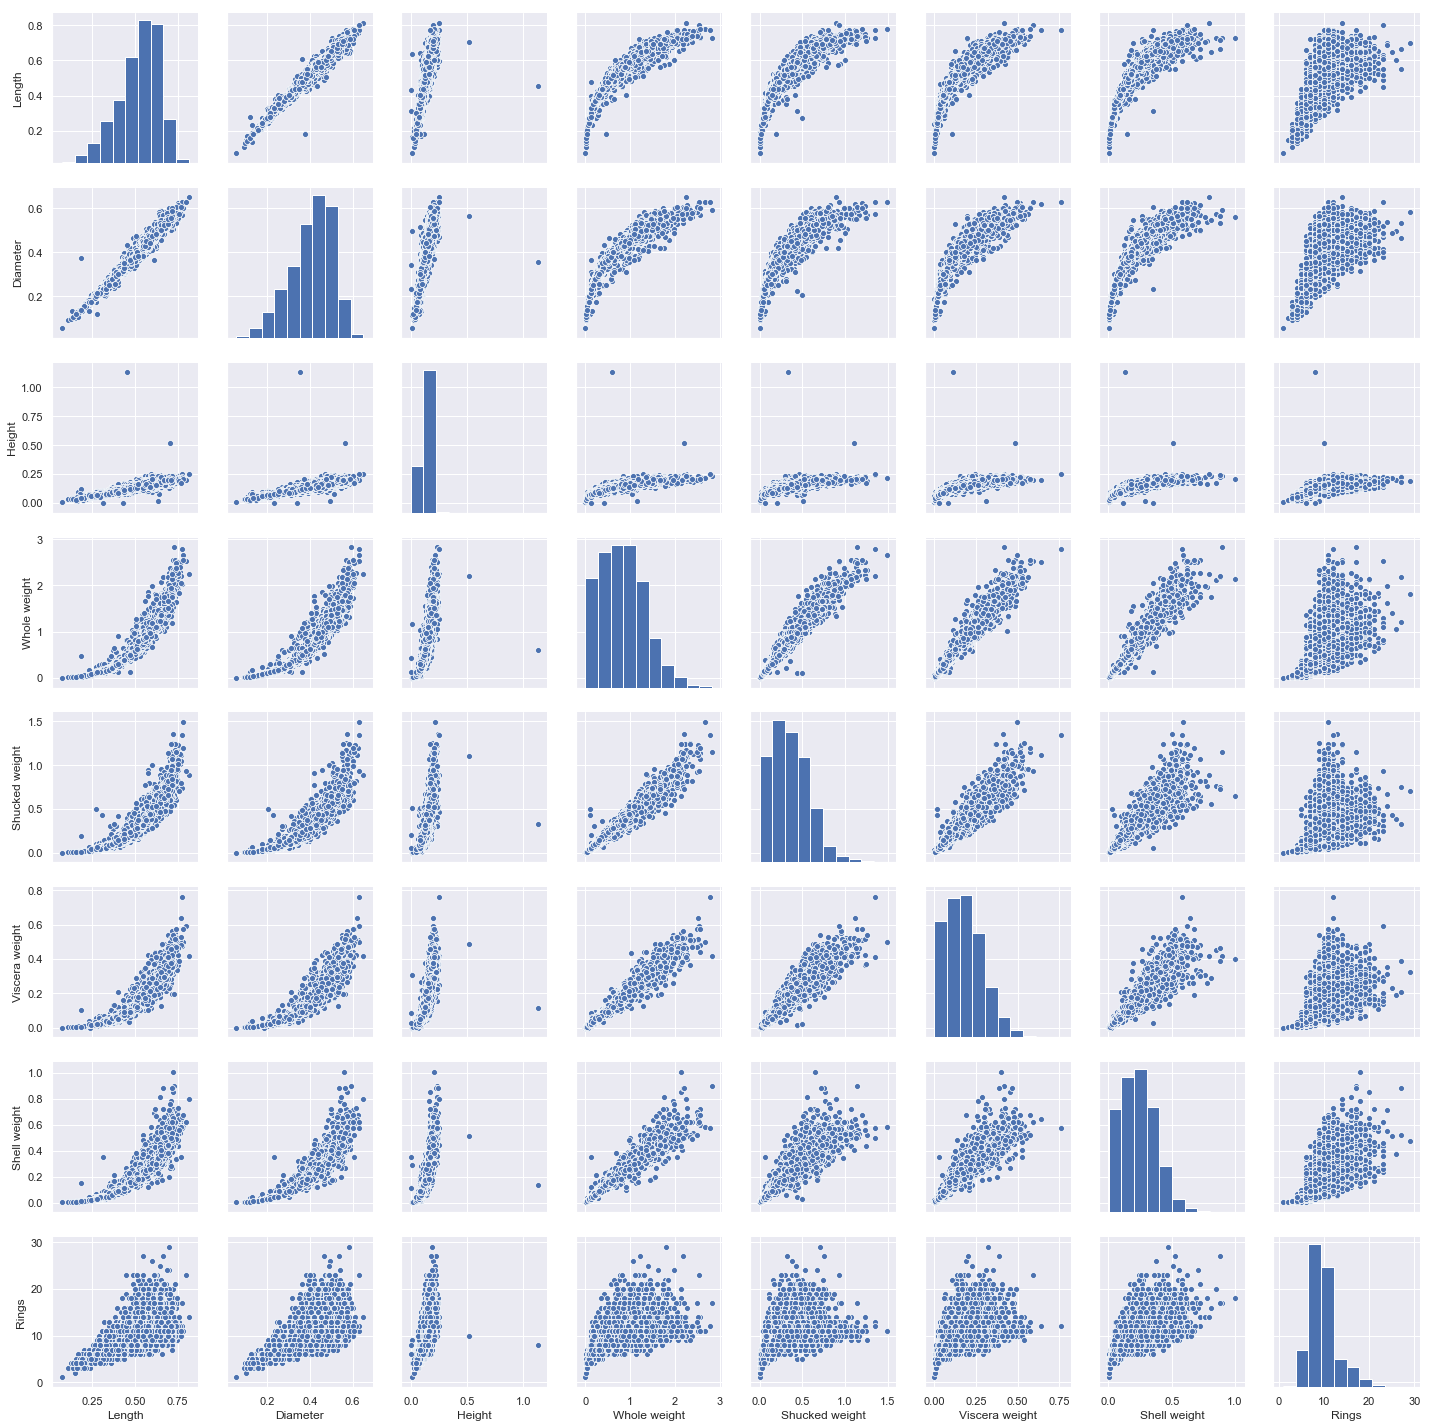

In [13]:
sns.set()
cols = ['Length','Diameter','Height','Whole weight', 'Shucked weight','Viscera weight', 'Shell weight','Rings']
sns.pairplot(abalone[cols], height = 2.5)
plt.show()

As seen on the plots above:
- Length and diameter are linearly correlated
- Height presents some values of 0
- Height has some outliers (above 0.4) that can affected skewness, they should be removed

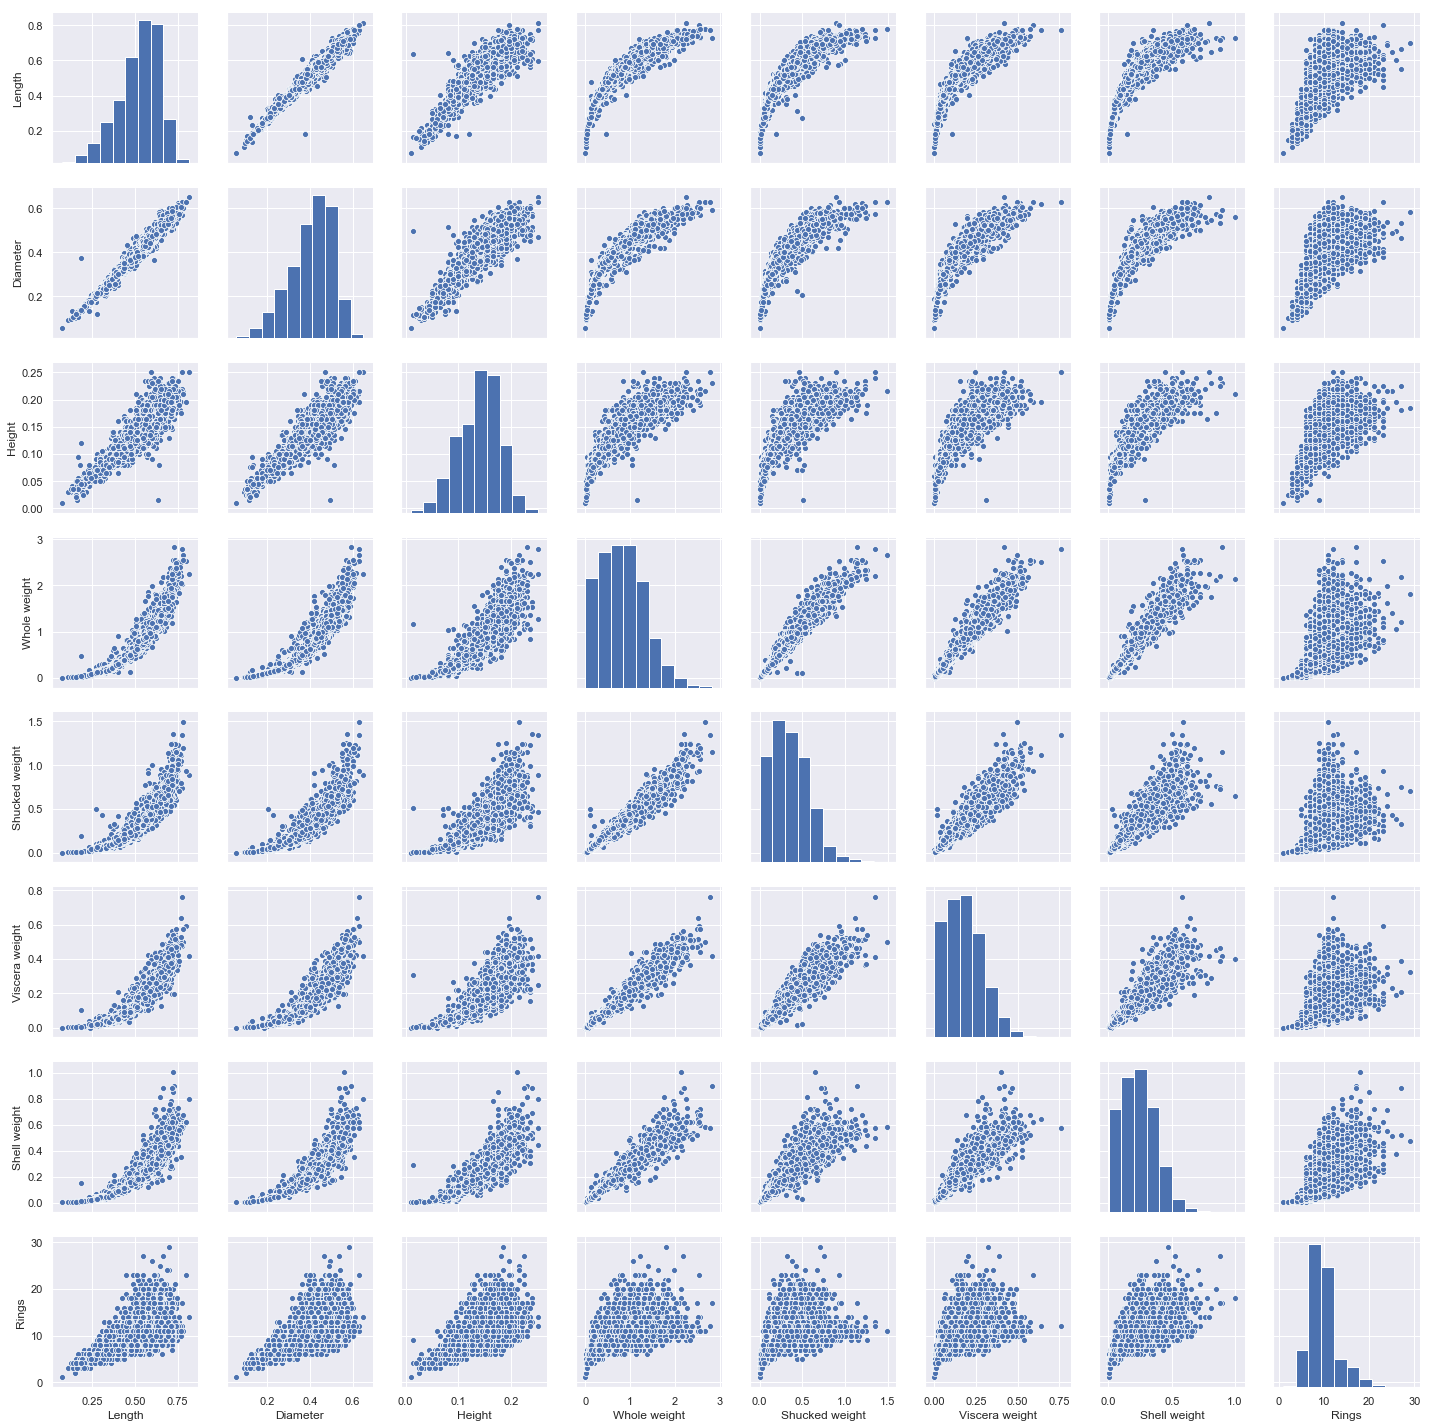

In [14]:
# Clean data that has 0.0 height and the outliers that may cause skewness
abalone = abalone[abalone.Height > 0]
abalone = abalone[abalone.Height < 0.4]
sns.set()
cols = ['Length','Diameter','Height','Whole weight', 'Shucked weight','Viscera weight', 'Shell weight','Rings']
sns.pairplot(abalone[cols], height = 2.5)
plt.show()

In [20]:
# Check dataset skewness
nf = abalone.select_dtypes(include=[np.number]).columns
skew_list = stats.skew(abalone[nf])
skew_list_df = pd.concat([pd.DataFrame(nf,columns=['Features']),pd.DataFrame(skew_list,columns=['Skewness'])],axis = 1)
skew_list_df.sort_values(by='Skewness', ascending = False)

,Features,Skewness
7,Rings,1.112866
4,Shucked weight,0.714381
6,Shell weight,0.620855
5,Viscera weight,0.589246
3,Whole weight,0.528131
2,Height,-0.249226
1,Diameter,-0.610588
0,Length,-0.641314


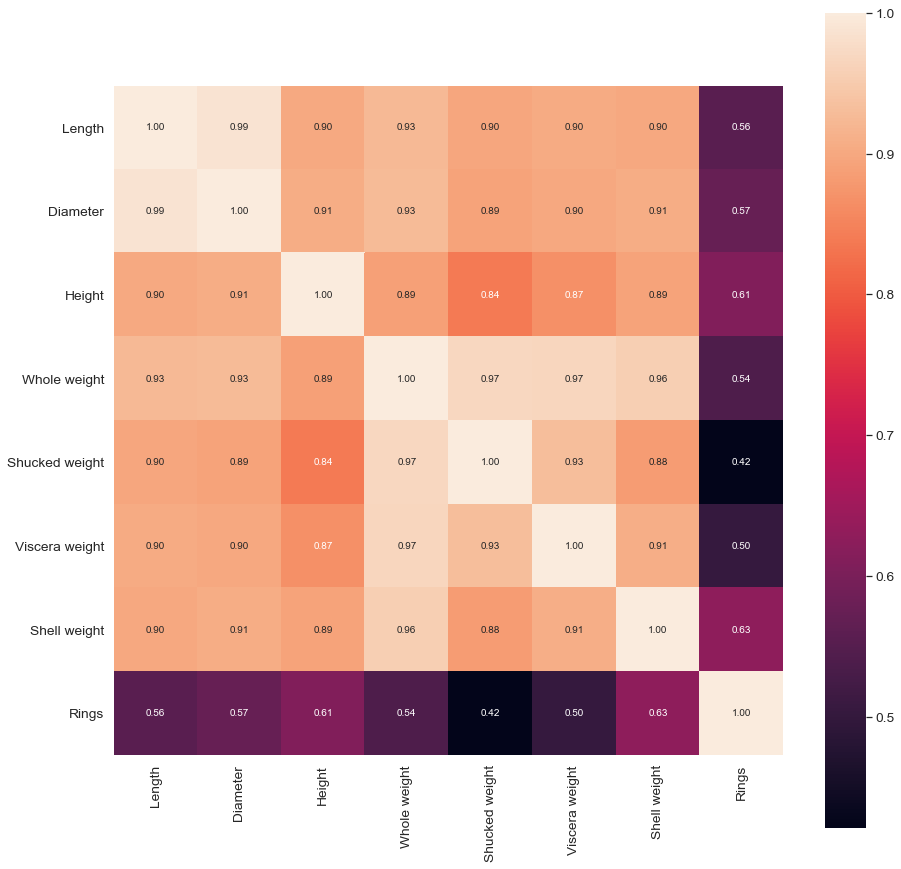

In [21]:
# Correlation matrix
corrmat = abalone.corr()
cols = corrmat.nlargest(8, 'Rings')['Rings'].index
cm = np.corrcoef(abalone[nf].values.T)
sns.set(font_scale=1.25)
plt.figure(figsize=(15,15))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=nf.values, xticklabels=nf.values)
plt.show()